<a href="https://colab.research.google.com/github/diaznugraha03/UAS_MachineLearning/blob/main/game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Baca data CSV ke dalam DataFrame
df = pd.read_csv('drive/MyDrive/dataset/vgsales.csv', sep=';')


In [4]:
# Buat fungsi untuk menghitung total penjualan global per genre
def total_sales_by_genre(df):
    return df.groupby('Genre')['Global_Sales'].sum().reset_index()

In [5]:
# Hitung total penjualan global per genre
genre_sales = total_sales_by_genre(df)

In [6]:
# Persiapkan data untuk analisis regresi linear
X = genre_sales[['Genre']]
y = genre_sales['Global_Sales']

In [7]:
# Membuat pipeline untuk transformasi dan model
pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder()),  # One-hot encoding untuk variabel kategorikal
    ('model', LinearRegression())  # Model regresi linear
])

In [8]:
# Fit model
pipeline.fit(X, y)

Pipeline(steps=[('onehot', OneHotEncoder()), ('model', LinearRegression())])

In [9]:
# Tampilkan hasil regresi
coef = pipeline.named_steps['model'].coef_
intercept = pipeline.named_steps['model'].intercept_
print('Koefisien regresi:', coef)
print('Intercept:', intercept)

Koefisien regresi: [1007.66416667 -505.42583333 -294.33583333   66.71416667   88.12416667
 -498.29583333  -11.20583333  184.12416667  294.12416667 -351.04583333
  587.68416667 -568.12583333]
Intercept: 743.2458333333334


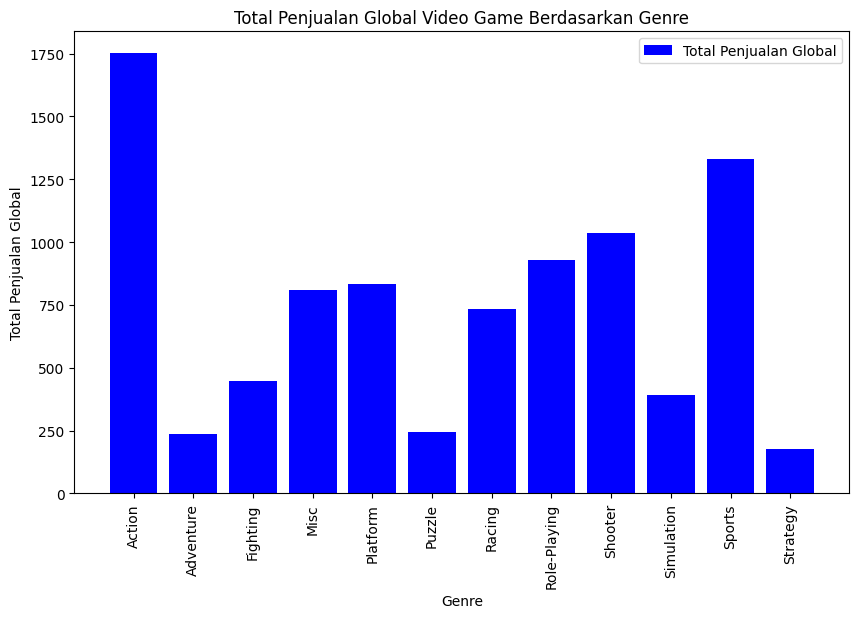

In [10]:
# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.bar(genre_sales['Genre'], genre_sales['Global_Sales'], color='blue', label='Total Penjualan Global')
plt.xlabel('Genre')
plt.ylabel('Total Penjualan Global')
plt.title('Total Penjualan Global Video Game Berdasarkan Genre')
plt.xticks(rotation=90)
plt.legend()
plt.show()